In [14]:
import sklearn
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import mglearn

In [15]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))
print(ram_prices)

     Unnamed: 0     date         price
0             0  1957.00  4.110418e+08
1             1  1959.00  6.794772e+07
2             2  1960.00  5.242880e+06
3             3  1965.00  2.642412e+06
4             4  1970.00  7.340030e+05
5             5  1973.00  3.993600e+05
6             6  1974.00  3.145730e+05
7             7  1975.00  4.218880e+05
8             8  1975.08  1.802240e+05
9             9  1975.25  6.758400e+04
10           10  1975.75  4.992000e+04
11           11  1976.00  4.070400e+04
12           12  1976.17  4.896000e+04
13           13  1976.42  2.304000e+04
14           14  1976.58  3.200000e+04
15           15  1977.08  3.680000e+04
16           16  1978.17  2.800000e+04
17           17  1978.25  2.944000e+04
18           18  1978.33  1.920000e+04
19           19  1978.50  2.400000e+04
20           20  1978.58  1.600000e+04
21           21  1978.75  1.520000e+04
22           22  1979.00  1.052800e+04
23           23  1979.75  6.704000e+03
24           24  1980.00 

In [16]:
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >=  2000]
X_train = data_train.date[:,np.newaxis]
y_train = np.log(data_train.price)

In [17]:
tree = DecisionTreeRegressor().fit(X_train,y_train)
linearReg = LinearRegression().fit(X_train,y_train)

print("Tree training score:{}".format(tree.score(X_train,y_train)))
print("Linear Reg training score:{}".format(linearReg.score(X_train,y_train)))

Tree training score:1.0
Linear Reg training score:0.9592820391429787


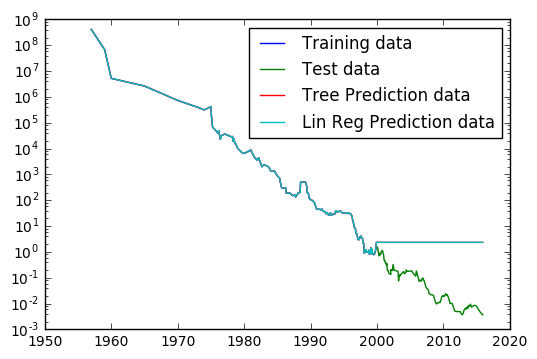

In [27]:
#Predict for all data

pred_tree = tree.predict(ram_prices.date[:,np.newaxis])
pred_linreg = tree.predict(ram_prices.date[:,np.newaxis])

price_tree = np.exp(pred_tree)
price_linreg = np.exp(pred_linreg)

plt.semilogy(data_train.date,data_train.price,label="Training data")
plt.semilogy(data_test.date,data_test.price,label="Test data")
plt.semilogy(ram_prices.date,price_tree,label="Tree Prediction data")
plt.semilogy(ram_prices.date,price_linreg,label="Lin Reg Prediction data")
plt.legend()